In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])

y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока). Сделайте вывод.

In [3]:
def calc_std_fit(x):
    res = (x - x.mean()) / x.std()
    return res

In [4]:
X_st = X.copy().astype(np.float64)
X1_mean = X[1].mean()
X1_std = X[1].std()
X_st[1] = (X[1] - X1_mean) / X1_std
X_st[2] = calc_std_fit(X[2])
X_st[3] = calc_std_fit(X[3])

In [5]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [6]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
    return W

In [7]:
lambda_list = np.array([1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1])
W0_list = []
W1_list = []
W2_list = []
W3_list = []
for lambda_ in lambda_list:
    W = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=lambda_)
    W0_list.append(W[0])
    W1_list.append(W[1])
    W2_list.append(W[2])
    W3_list.append(W[3])

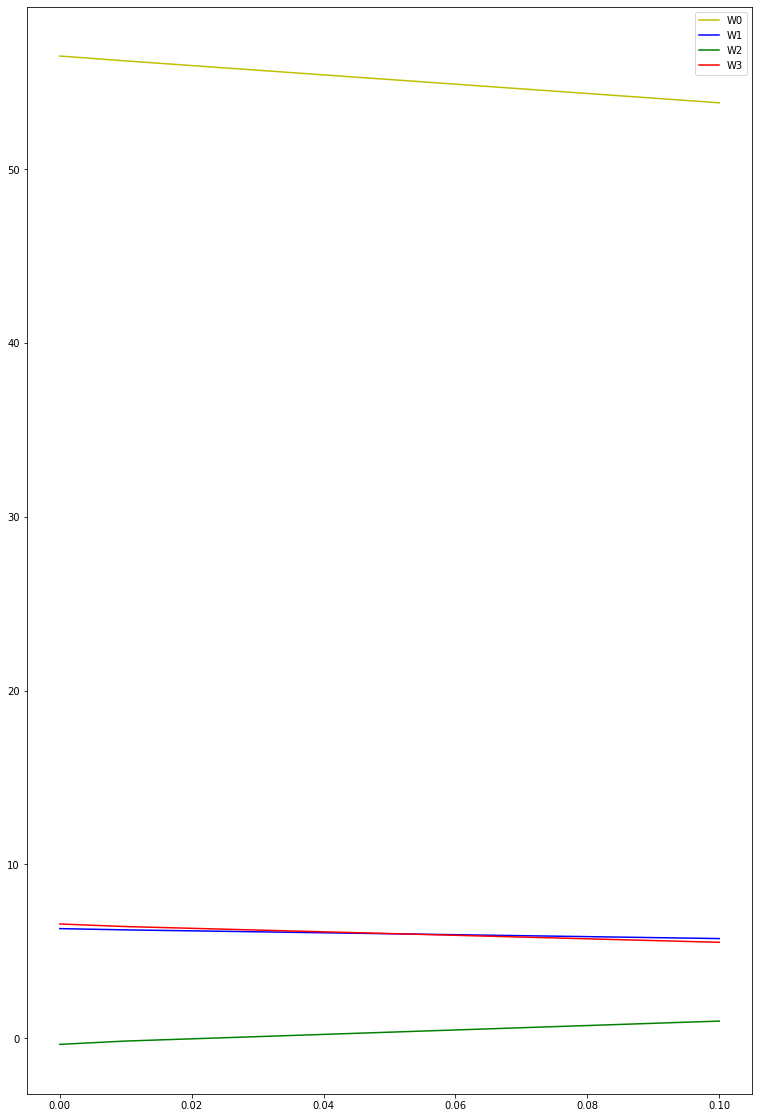

In [8]:
plt.figure(figsize=(13, 20))
plt.plot(lambda_list, W0_list, color='y', label = 'W0')
plt.plot(lambda_list, W1_list, color='b', label = 'W1')
plt.plot(lambda_list, W2_list, color='g', label = 'W2')
plt.plot(lambda_list, W3_list, color='r', label = 'W3')
plt.legend()

Видим, что большие веса с увеличением lambda_ уменьшаются, а малые увеличиваются.

2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Одновременно нет, потому что данные приводятся к разным диапазонам: стандартизация показывает значение сдвига каждого признака от среднего, а нормализация приводит данные к диапазону между 0 и 1. Можно применить для обучения разных моделей и сравнить полученные результаты для выявления оптимального метода масштабирования.

3. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [9]:
#f(x, W) + (lambda_/2) * np.sum(np.abs(W)) #L1
#f(x, W) + (lambda_/2) * np.sum(W**2)      #L2

In [10]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T) + lambda_ * np.abs(W))
    return W

In [11]:
W1 = eval_model_reg1(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)
W1

array([56.49435056,  6.29699202, -0.32997899,  6.54978379])